<a href="https://colab.research.google.com/github/sweetiepickle/AI-2023-midterm-report/blob/main/AI_midterm_face_detecting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#libraries
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# data -> model -> compile -> evaluate

In [ ]:
# step 1 : data initializing 

# orginal value of an image is from 0 to 255
# target value is from 0 to 1 
resizeData = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)    
trainingData= resizeData.flow_from_directory('/content/drive/MyDrive/AI 2023/data/face detect/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1188 images belonging to 20 classes.


In [ ]:
# folder classifying
trainingData.class_indices

{'Bao Thai': 0,
 'Hau': 1,
 'Hoai Phong': 2,
 'Hoang Thanh': 3,
 'Huu Long': 4,
 'Minh Tien': 5,
 'Ngoc Hieu': 6,
 'Ngoc Minh': 7,
 'Ngoc Sang': 8,
 'Ngoc Thach': 9,
 'Nguyen Hoang': 10,
 'Nguyen Tuan Kiet': 11,
 'Pham Quang Huy': 12,
 'Phuc Dung': 13,
 'Quang Huy': 14,
 'Quang Phuc': 15,
 'Son Tung': 16,
 'Tan Dat': 17,
 'Tan Phat': 18,
 'Viet Ha': 19}

In [ ]:
# step 2 : cnn netwwork  : sequential model
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

# Data flattening
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# step 4 :compiling

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(trainingData, batch_size = 128, epochs = 30 , verbose = 1)

Epoch 1/30
38/38 [==============================] - 257s 6s/step - loss: 3.1054 - accuracy: 0.0623
Epoch 2/30
38/38 [==============================] - 10s 271ms/step - loss: 2.9915 - accuracy: 0.0572
Epoch 3/30
38/38 [==============================] - 10s 251ms/step - loss: 2.7904 - accuracy: 0.1397
Epoch 4/30
38/38 [==============================] - 8s 221ms/step - loss: 1.6817 - accuracy: 0.4646
Epoch 5/30
38/38 [==============================] - 9s 244ms/step - loss: 0.8565 - accuracy: 0.7416
Epoch 6/30
38/38 [==============================] - 10s 250ms/step - loss: 0.5838 - accuracy: 0.8308
Epoch 7/30
38/38 [==============================] - 9s 234ms/step - loss: 0.3363 - accuracy: 0.9032
Epoch 8/30
38/38 [==============================] - 9s 234ms/step - loss: 0.2656 - accuracy: 0.9251
Epoch 9/30
38/38 [==============================] - 9s 249ms/step - loss: 0.2186 - accuracy: 0.9369
Epoch 10/30
38/38 [==============================] - 10s 282ms/step - loss: 0.2431 - accuracy: 0.9

In [ ]:
# step 5 : evaluating
eva = model.evaluate(trainingData, verbose = 1 )
# verbose = 0 -> display nothing
# verbose = 1 -> display only learns recently
# verbose = 2 -> display everything learnt
print('loss: ', eva[0])
print('accuracy: ', eva[1])

38/38 [==============================] - 8s 207ms/step - loss: 0.0449 - accuracy: 0.9907
loss:  0.044883884489536285
accuracy:  0.9907407164573669


In [ ]:
model.save('/content/drive/MyDrive/AI 2023/model AI/ face detect.h5')

In [ ]:
model_1=load_model('/content/drive/MyDrive/AI 2023/model AI/ face detect.h5')

1/1 [==============================] - 0s 495ms/step
Quang Phuc


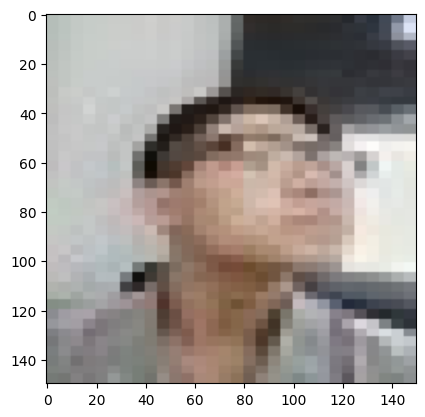

1/1 [==============================] - 0s 20ms/step
Quang Phuc


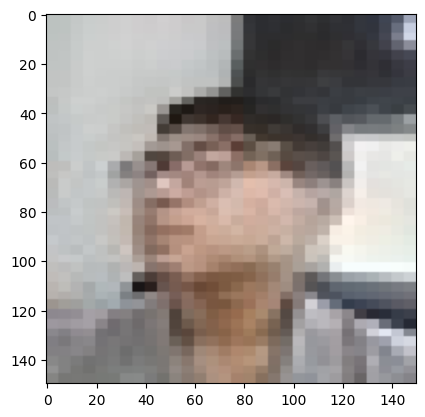

1/1 [==============================] - 0s 23ms/step
Quang Phuc


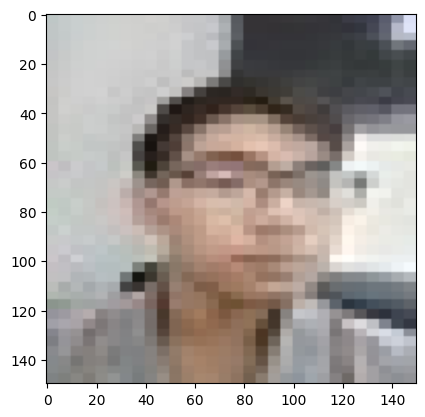

1/1 [==============================] - 0s 20ms/step
Phuc Dung


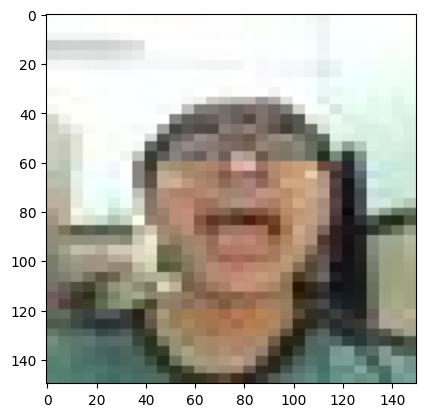

1/1 [==============================] - 0s 18ms/step
Phuc Dung


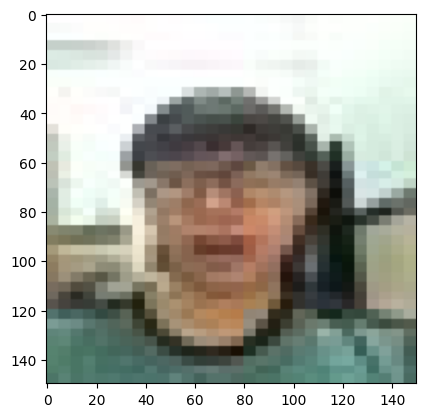

1/1 [==============================] - 0s 19ms/step
Phuc Dung


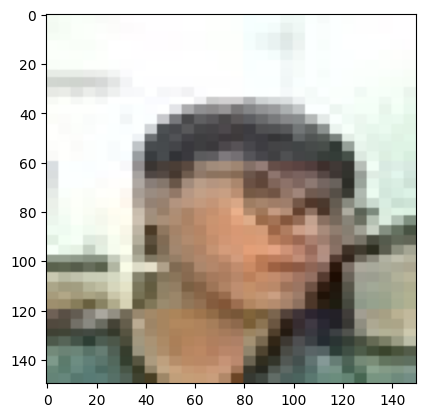

1/1 [==============================] - 0s 19ms/step
Phuc Dung


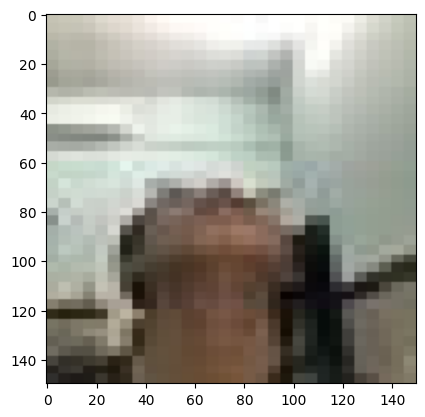

1/1 [==============================] - 0s 26ms/step
Phuc Dung


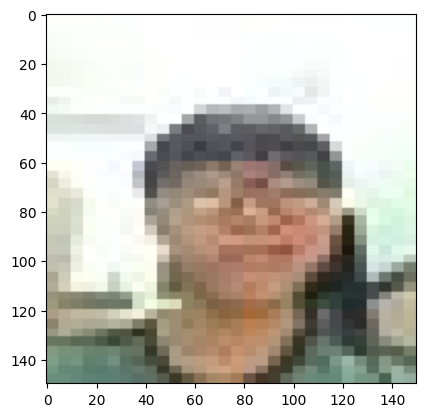

1/1 [==============================] - 0s 29ms/step
Son Tung


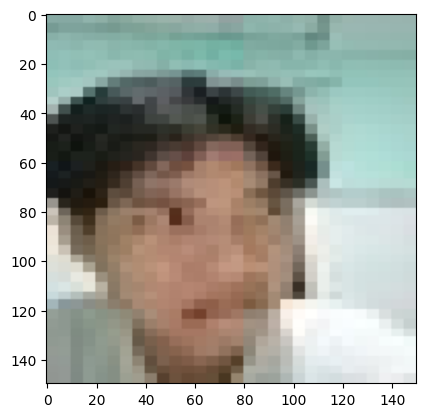

1/1 [==============================] - 0s 26ms/step
Son Tung


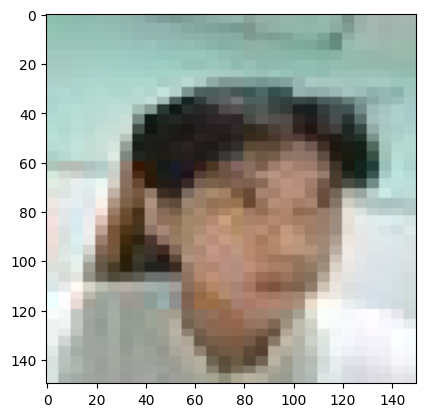

1/1 [==============================] - 0s 30ms/step
Nguyen Hoang


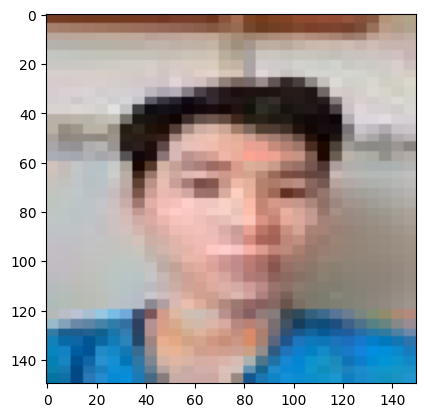

1/1 [==============================] - 0s 28ms/step
Nguyen Hoang


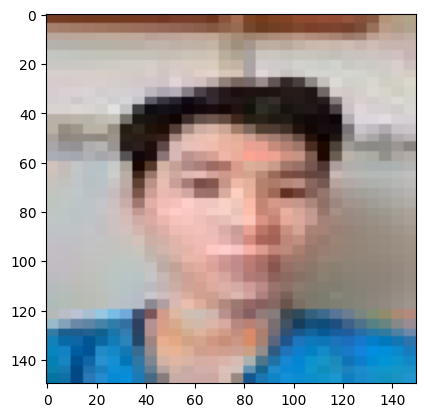

1/1 [==============================] - 0s 18ms/step
Phuc Dung


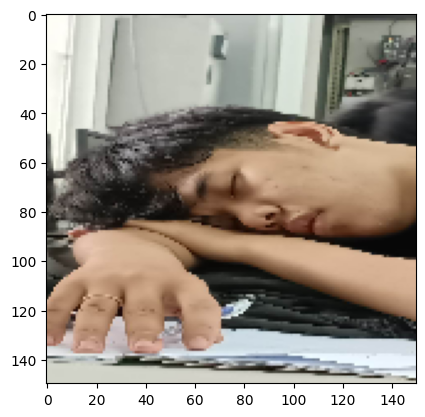

In [ ]:
test = '/content/drive/MyDrive/AI 2023/data/face detect/validation'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Bao Thai','Hau','Hoai phong','Hoang Thanh','Huu Long','Minh Tien', 'Ngoc Hieu','Ngoc Minh','Ngoc Sang','Ngoc Thach','Nguyen Hoang','Nguyen Tuan Kiet','Pham Quang Huy','Phuc Dung', 'Quang Huy','Quang Phuc','Son Tung','Tan Dat','Tan Phat','Viet Ha']
  print(class_name[result])
  plt.show()